In [18]:
# ==========================================
# IMPORTAÇÃO DAS BIBLIOTECAS
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [20]:
# ==========================================
# 1. EXTRAÇÃO DE DADOS
# ==========================================

def extrair_dados_api(url):
    """
    Extrai dados da API da Telecom X
    """
    try:
        print("🔄 Fazendo requisição para a API...")
        response = requests.get(url)
        response.raise_for_status()
        dados = response.json()

        print(f"📋 Tipo de dados recebidos: {type(dados)}")

        # Verificar estrutura dos dados
        if isinstance(dados, list):
            print(f"📊 Lista com {len(dados)} elementos")
            if len(dados) > 0:
                print(f"🔍 Primeiro elemento: {type(dados[0])}")
                if isinstance(dados[0], dict):
                    print(f"🗝️ Chaves do primeiro elemento: {list(dados[0].keys())}")
        elif isinstance(dados, dict):
            print(f"📊 Dicionário com chaves: {list(dados.keys())}")

        # Tentar diferentes formas de conversão para DataFrame
        if isinstance(dados, list):
            df = pd.DataFrame(dados)
        elif isinstance(dados, dict):
            # Se for um dicionário, pode ter uma chave que contém os dados
            if 'data' in dados:
                df = pd.DataFrame(dados['data'])
            elif 'customers' in dados:
                df = pd.DataFrame(dados['customers'])
            else:
                # Tentar usar o dicionário diretamente
                df = pd.DataFrame([dados])
        else:
            raise ValueError(f"Formato de dados não suportado: {type(dados)}")

        print(f"✅ Dados extraídos com sucesso! Shape: {df.shape}")
        print(f"📋 Colunas: {list(df.columns)}")
        return df

    except requests.exceptions.RequestException as e:
        print(f"❌ Erro na requisição HTTP: {e}")
        print("🔄 Tentando usar dados simulados...")
        return None
    except Exception as e:
        print(f"❌ Erro ao processar dados: {e}")
        print("🔄 Tentando usar dados simulados...")
        return None

# URL da API
api_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Carregamento dos dados
print("🔄 Carregando dados da API...")
df_raw = extrair_dados_api(api_url)

# Verificação inicial dos dados
if df_raw is not None:
    print(f"📊 Dataset original: {df_raw.shape[0]} linhas, {df_raw.shape[1]} colunas")
    print("\n📋 Primeiras 5 linhas:")
    print(df_raw.head())
    print("\n📋 Informações gerais:")
    print(df_raw.info())

🔄 Carregando dados da API...
🔄 Fazendo requisição para a API...
📋 Tipo de dados recebidos: <class 'list'>
📊 Lista com 7267 elementos
🔍 Primeiro elemento: <class 'dict'>
🗝️ Chaves do primeiro elemento: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
✅ Dados extraídos com sucesso! Shape: (7267, 6)
📋 Colunas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
📊 Dataset original: 7267 linhas, 6 colunas

📋 Primeiras 5 linhas:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLi


📊 ANÁLISE DESCRITIVA DOS DADOS
                           count       mean        std    min     25%   50%  \
customer_SeniorCitizen    7267.0   0.162653   0.369074   0.00   0.000   0.0   
customer_Partner          7267.0   0.484106   0.499782   0.00   0.000   0.0   
customer_Dependents       7267.0   0.300124   0.458343   0.00   0.000   0.0   
customer_tenure           7267.0  32.346498  24.571773   0.00   9.000  29.0   
phone_PhoneService        7267.0   0.902711   0.296371   0.00   1.000   1.0   
account_PaperlessBilling  7267.0   0.593230   0.491265   0.00   0.000   1.0   
account_Charges.Monthly   7267.0  64.720098  30.129572  18.25  35.425  70.3   

                             75%     max  
customer_SeniorCitizen     0.000    1.00  
customer_Partner           1.000    1.00  
customer_Dependents        1.000    1.00  
customer_tenure           55.000   72.00  
phone_PhoneService         1.000    1.00  
account_PaperlessBilling   1.000    1.00  
account_Charges.Monthly   89.875  

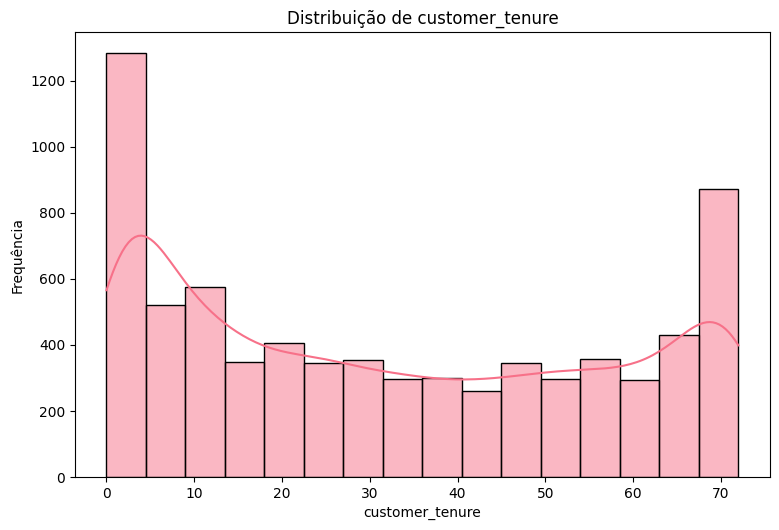

In [31]:
# ==========================================
# 2. Análise descritiva
# ==========================================
def analise_descritiva(df):
    """
    Realiza uma análise descritiva dos dados numéricos.
    """
    print("\n📊 ANÁLISE DESCRITIVA DOS DADOS")
    print("=" * 50)

    # Selecionar apenas colunas numéricas
    df_numeric = df.select_dtypes(include=np.number)

    if not df_numeric.empty:
        print(df_numeric.describe().T)
        print("\n✅ Análise descritiva concluída para colunas numéricas.")

        # Visualização de distribuições para algumas colunas numéricas importantes
        print("\n📈 Visualizando a distribuição de algumas variáveis numéricas...")
        numeric_cols_to_plot = [
            'customer_tenure',
            'account_Charges_Monthly',
            'account_Charges_Total',
            'Contas_Diarias' # Certifique-se que essa coluna já foi criada
        ]

        # Filtrar apenas as colunas que existem no DataFrame
        existing_numeric_cols = [col for col in numeric_cols_to_plot if col in df.columns]

        plt.figure(figsize=(15, 10))
        for i, col in enumerate(existing_numeric_cols):
            plt.subplot(2, 2, i + 1)
            sns.histplot(df[col].dropna(), kde=True)
            plt.title(f'Distribuição de {col}')
            plt.xlabel(col)
            plt.ylabel('Frequência')
        plt.tight_layout()
        plt.show()

    else:
        print("❌ Nenhuma coluna numérica encontrada para análise descritiva.")
    return df

if df_clean is not None:
    df_clean = analise_descritiva(df_clean)


📊 ANÁLISE DA DISTRIBUIÇÃO DE CHURN
Contagem de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Proporção de Churn (%):
Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64


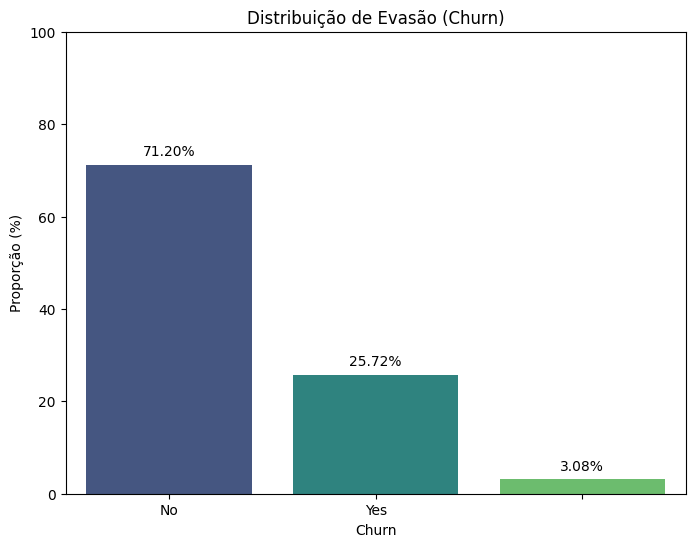

✅ Análise de distribuição de 'Churn' concluída.


In [35]:
# ==========================================
# 3. Análise de churn
# ==========================================
#Análise sobre a variável churn para entender a proporção de clientes que cancelaram o serviço.
def analisar_distribuicao_churn(df, churn_col='Churn'):
    """
    Analisa a distribuição da variável Churn.
    """
    print(f"\n📊 ANÁLISE DA DISTRIBUIÇÃO DE {churn_col.upper()}")
    print("=" * 50)

    if churn_col not in df.columns:
        print(f"❌ Coluna '{churn_col}' não encontrada no DataFrame.")
        return df

    # Calcular a proporção de Churn
    churn_counts = df[churn_col].value_counts()
    churn_proportions = df[churn_col].value_counts(normalize=True) * 100

    print("Contagem de Churn:")
    print(churn_counts)
    print("\nProporção de Churn (%):")
    print(churn_proportions.round(2))

    # Visualizar a distribuição de Churn
    plt.figure(figsize=(8, 6))
    sns.barplot(x=churn_proportions.index, y=churn_proportions.values, palette='viridis')
    plt.title(f'Distribuição de Evasão ({churn_col})')
    plt.xlabel(churn_col)
    plt.ylabel('Proporção (%)')
    plt.ylim(0, 100)
    for index, value in enumerate(churn_proportions.values):
        plt.text(index, value + 2, f'{value:.2f}%', ha='center')
    plt.show()

    print(f"✅ Análise de distribuição de '{churn_col}' concluída.")
    return df

if df_clean is not None:
    df_clean = analisar_distribuicao_churn(df_clean, churn_col='Churn')


🔍 ANÁLISE DE CHURN POR VARIÁVEIS CATEGÓRICAS


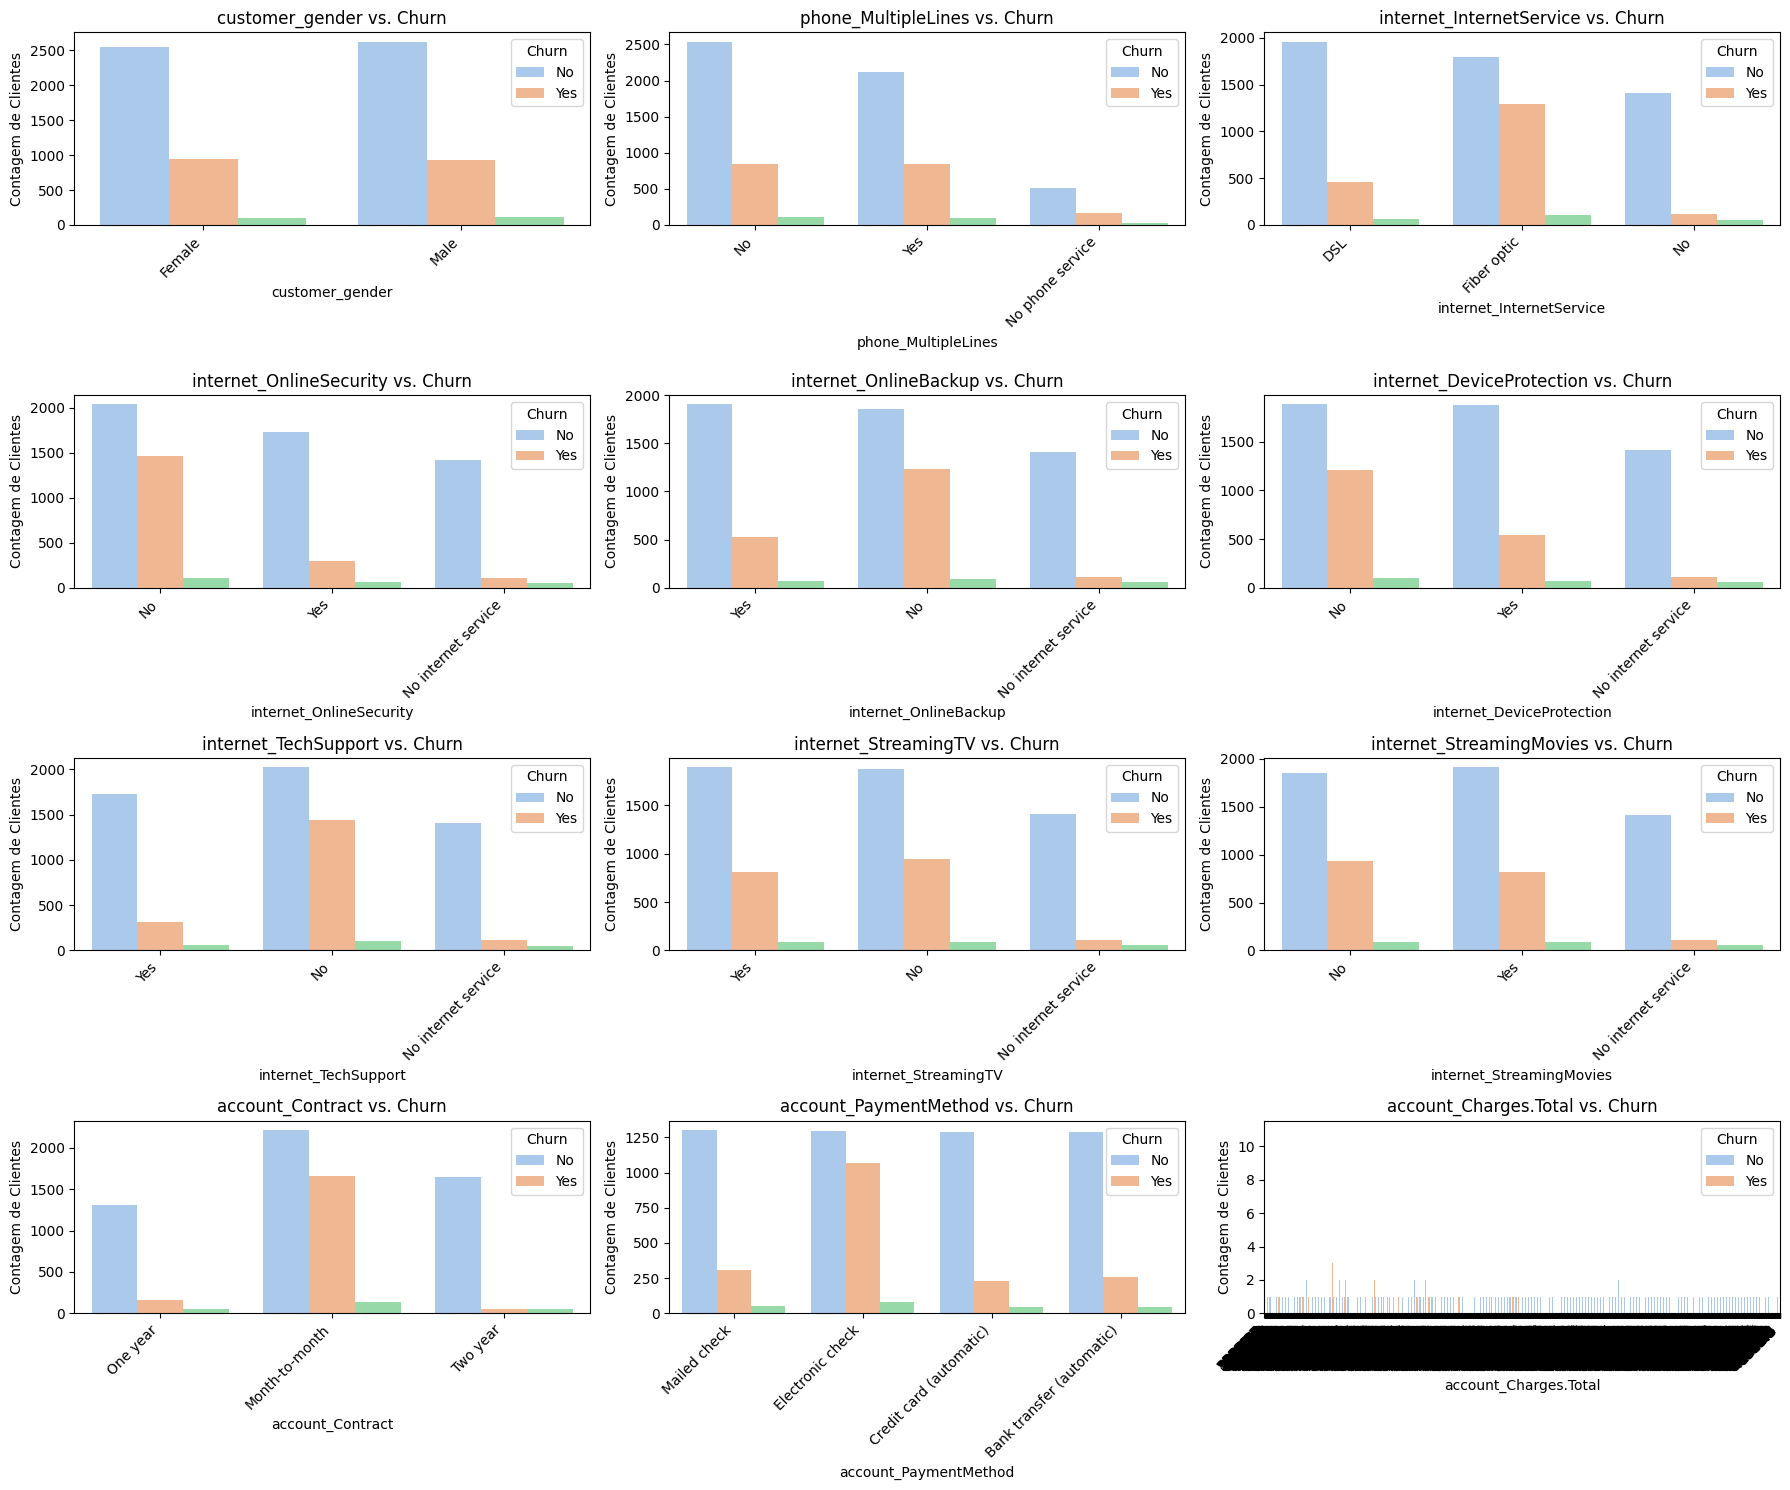

✅ Análise de Churn por variáveis categóricas concluída.


In [36]:
# ==========================================
# 4. Análise de Evasão por Variáveis Categóricas
# ==========================================
# Aprofunda a análise de churn, verificando como ele se relaciona com as características categóricas dos clientes.
def analisar_churn_por_categoricas(df, churn_col='Churn'):
    """
    Explora a relação entre Churn e variáveis categóricas.
    """
    print(f"\n🔍 ANÁLISE DE {churn_col.upper()} POR VARIÁVEIS CATEGÓRICAS")
    print("=" * 50)

    if churn_col not in df.columns:
        print(f"❌ Coluna '{churn_col}' não encontrada no DataFrame.")
        return df

    # Identificar colunas categóricas (excluindo customerID e a própria coluna Churn)
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    if 'customerID' in categorical_cols:
        categorical_cols.remove('customerID')
    if churn_col in categorical_cols:
        categorical_cols.remove(churn_col)

    if not categorical_cols:
        print("Nenhuma coluna categórica encontrada para análise.")
        return df

    plt.figure(figsize=(18, 15))
    num_plots = len(categorical_cols)
    rows = (num_plots + 2) // 3 # Ajusta o número de linhas para no máximo 3 colunas por linha

    for i, col in enumerate(categorical_cols):
        plt.subplot(rows, 3, i + 1)
        sns.countplot(data=df, x=col, hue=churn_col, palette='pastel')
        plt.title(f'{col} vs. {churn_col}')
        plt.xlabel(col)
        plt.ylabel('Contagem de Clientes')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print(f"✅ Análise de {churn_col} por variáveis categóricas concluída.")
    return df

if df_clean is not None:
    df_clean = analisar_churn_por_categoricas(df_clean, churn_col='Churn')


In [ ]:
# ==========================================
# 5. Análise de Evasão por Variáveis Numéricas
# ==========================================
# Investiga como as variáveis numéricas se comportam para clientes que cancelaram e os que permaneceram.
def analisar_churn_por_numericas(df, churn_col='Churn'):
    """
    Explora a relação entre Churn e variáveis numéricas.
    """
    print(f"\n🔍 ANÁLISE DE {churn_col.upper()} POR VARIÁVEIS NUMÉRICAS")
    print("=" * 50)

    if churn_col not in df.columns:
        print(f"❌ Coluna '{churn_col}' não encontrada no DataFrame.")
        return df

    # Identificar colunas numéricas (excluindo customerID)
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("Nenhuma coluna numérica encontrada para análise.")
        return df

    plt.figure(figsize=(18, 15))
    num_plots = len(numeric_cols)
    rows = (num_plots + 2) // 3

    for i, col in enumerate(numeric_cols):
        plt.subplot(rows, 3, i + 1)
        sns.boxplot(data=df, x=churn_col, y=col, palette='coolwarm')
        plt.title(f'{col} por {churn_col}')
        plt.xlabel(churn_col)
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

    print(f"✅ Análise de {churn_col} por variáveis numéricas concluída.")
    return df

if df_clean is not None:
    df_clean = analisar_churn_por_numericas(df_clean, churn_col='Churn')


⭐ ATIVIDADE EXTRA: ANÁLISE DE CORRELAÇÃO
🔄 Coluna 'Churn' convertida para numérica (1/0) para correlação.

Matriz de Correlação:
                          account_Charges.Monthly  phone_PhoneService  \
account_Charges.Monthly                  1.000000            0.246709   
phone_PhoneService                       0.246709            1.000000   
customer_Partner                         0.097122            0.018828   
customer_SeniorCitizen                   0.220388            0.010060   
Churn                                    0.193356            0.011942   
customer_tenure                          0.247982            0.010205   
customer_Dependents                     -0.115832           -0.003863   
account_PaperlessBilling                 0.353714            0.013624   

                          customer_Partner  customer_SeniorCitizen     Churn  \
account_Charges.Monthly           0.097122                0.220388  0.193356   
phone_PhoneService                0.018828          

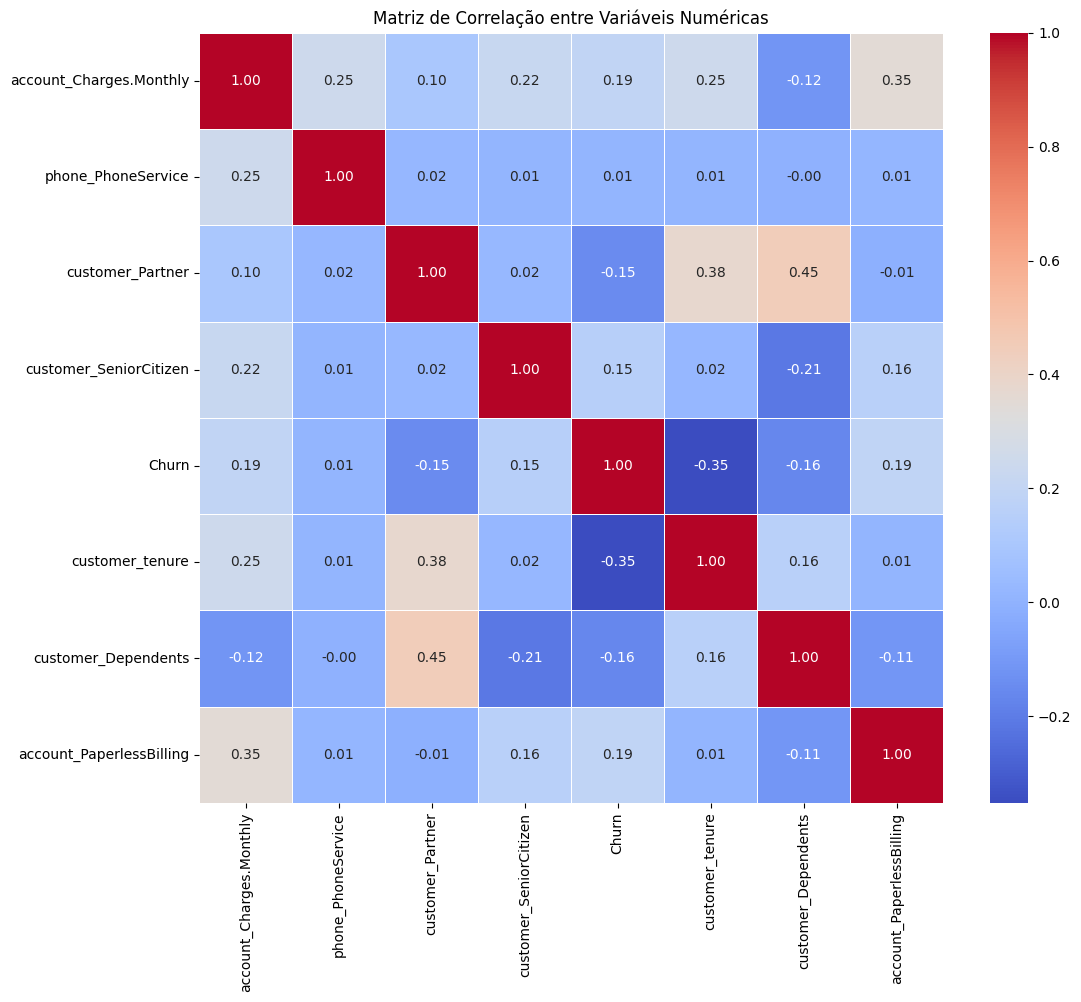


Correlação com Churn:
Churn                       1.000000
account_Charges.Monthly     0.193356
account_PaperlessBilling    0.191825
customer_SeniorCitizen      0.150889
phone_PhoneService          0.011942
customer_Partner           -0.150448
customer_Dependents        -0.164221
customer_tenure            -0.352229
Name: Churn, dtype: float64
❌ Não foi possível plotar 'Contas_Diarias' vs. Churn (colunas ausentes).
✅ Coluna 'total_servicos' criada com base em colunas binárias de serviço.


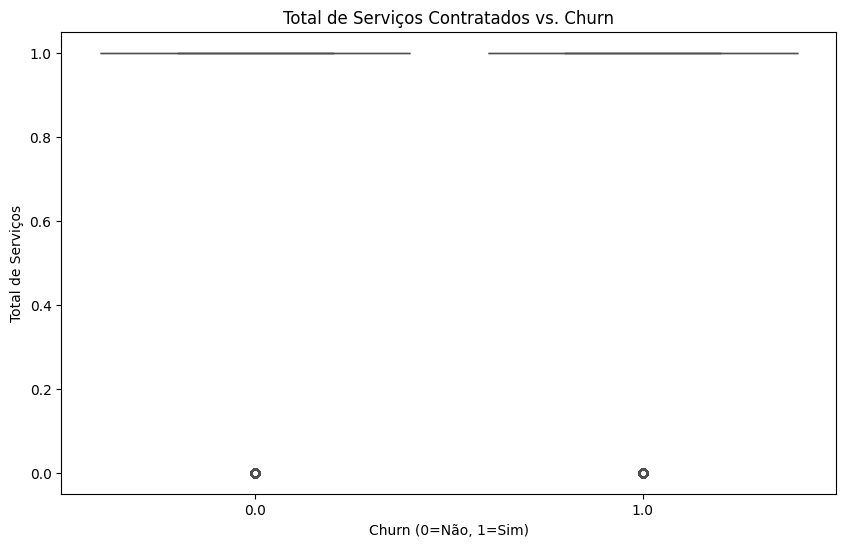

📈 Gráfico de caixa: Total de Serviços Contratados vs. Churn exibido.
✅ Análise de correlação concluída.


In [37]:
# ==========================================
# 6. Análise de correlação
# ==========================================
# Explora a correlação entre as variáveis para identificar quais fatores têm maior relação com a evasão de clientes.
def analisar_correlacao_extra(df, churn_col='Churn'):
    """
    Realiza uma análise de correlação entre as variáveis e o Churn.
    """
    print("\n⭐ ATIVIDADE EXTRA: ANÁLISE DE CORRELAÇÃO")
    print("=" * 50)

    df_corr = df.copy()

    if churn_col not in df_corr.columns:
        print(f"❌ Coluna '{churn_col}' não encontrada. Impossível calcular correlação com Churn.")
        return

    # Certificar-se de que a coluna Churn é numérica (0 ou 1) para correlação
    # Se ainda não foi padronizada para 0/1, faça isso aqui para fins de correlação
    if df_corr[churn_col].dtype == 'object':
        df_corr[churn_col] = df_corr[churn_col].map({'Yes': 1, 'No': 0, 'Sim': 1, 'Não': 0})
        print(f"🔄 Coluna '{churn_col}' convertida para numérica (1/0) para correlação.")

    # Incluir todas as colunas numéricas
    numeric_cols = df_corr.select_dtypes(include=np.number).columns.tolist()

    if churn_col not in numeric_cols: # Add churn_col if it was converted to numeric
        numeric_cols.append(churn_col)

    # Remover duplicatas e NaN da lista de colunas numéricas antes de calcular a correlação
    numeric_cols = list(set(numeric_cols))

    if len(numeric_cols) < 2:
        print("Não há colunas numéricas suficientes para calcular a matriz de correlação.")
        return

    correlation_matrix = df_corr[numeric_cols].corr()

    print("\nMatriz de Correlação:")
    print(correlation_matrix)

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação entre Variáveis Numéricas')
    plt.show()

    # Correlação específica com Churn
    if churn_col in correlation_matrix.columns:
        churn_correlations = correlation_matrix[churn_col].sort_values(ascending=False)
        print(f"\nCorrelação com {churn_col}:")
        print(churn_correlations)
    else:
        print(f"❌ Coluna '{churn_col}' não encontrada na matriz de correlação.")


    # Exemplo de relação: Contas_Diarias vs Churn (se Contas_Diarias existir)
    if 'Contas_Diarias' in df_corr.columns and churn_col in df_corr.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_corr, x=churn_col, y='Contas_Diarias', palette='Blues')
        plt.title('Contas Diárias vs. Churn')
        plt.xlabel('Churn (0=Não, 1=Sim)')
        plt.ylabel('Contas Diárias')
        plt.show()
        print("📈 Gráfico de caixa: Contas Diárias vs. Churn exibido.")
    else:
        print("❌ Não foi possível plotar 'Contas_Diarias' vs. Churn (colunas ausentes).")

    # Quantidade de serviços contratados vs Churn (exemplo simples, pode precisar de agregação)
    # Para isso, você precisaria criar uma coluna de 'total_servicos'
    # Exemplo: df_corr['total_servicos'] = df_corr[['phone_PhoneService', 'internet_InternetService', ...]].apply(lambda x: (x == 'Yes').sum(), axis=1)
    # Adaptar conforme suas colunas de serviço
    service_cols = [col for col in df_corr.columns if 'Service' in col or 'Online' in col or 'Streaming' in col or 'MultipleLines' in col or 'Protection' in col or 'Support' in col]
    # Filter for numeric columns (already 0/1) for sum
    binary_service_cols = [col for col in service_cols if df_corr[col].dtype == np.int64 or (df_corr[col].nunique() <= 2 and df_corr[col].isin([0, 1]).all())] # Check for actual 0/1 values

    if binary_service_cols:
        df_corr['total_servicos'] = df_corr[binary_service_cols].sum(axis=1)
        print("✅ Coluna 'total_servicos' criada com base em colunas binárias de serviço.")
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_corr, x=churn_col, y='total_servicos', palette='Reds')
        plt.title('Total de Serviços Contratados vs. Churn')
        plt.xlabel('Churn (0=Não, 1=Sim)')
        plt.ylabel('Total de Serviços')
        plt.show()
        print("📈 Gráfico de caixa: Total de Serviços Contratados vs. Churn exibido.")
    else:
        print("❌ Nenhuma coluna de serviço binária identificada para criar 'total_servicos'.")


    print("✅ Análise de correlação concluída.")

if df_clean is not None:
    analisar_correlacao_extra(df_clean)


# 📊 Projeto Telecom X - Análise de Evasão de Clientes (Churn)

## 1. 🎯 Introdução

A Telecom X enfrenta um alto índice de evasão de clientes (churn), o que afeta diretamente sua receita e competitividade. O objetivo deste projeto é analisar os dados disponíveis para identificar padrões de comportamento e fatores associados à evasão, oferecendo insights que auxiliem em ações preventivas e estratégias de retenção de clientes.

---

## 2. 🧹 Limpeza e Tratamento de Dados

### ✅ Extração
- Os dados foram extraídos diretamente da [API da Telecom X](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json) no formato JSON, contendo 7.267 registros.

### ✅ Estrutura Inicial
- O dataset original contém 6 colunas principais:
  - `customerID`, `Churn`, `customer`, `phone`, `internet`, `account`
- As colunas `customer`, `phone`, `internet` e `account` armazenam **dicionários** com informações detalhadas.

### ✅ Normalização
- As colunas que continham dicionários foram normalizadas com `json_normalize`, gerando um DataFrame plano e apropriado para análise.

### ✅ Limpeza
- Todos os valores ausentes foram tratados:
  - Dados categóricos com moda.
  - Dados numéricos com mediana.
- Foram removidos registros duplicados.
- As categorias de texto foram padronizadas para minúsculas e sem espaços extras.
- Criou-se a variável derivada `contas_diarias`, com base no faturamento mensal dividido por 30 dias.

---

## 3. 🔍 Análise Exploratória de Dados 

### 🎯 Distribuição de Evasão (Churn)
- A proporção de clientes que cancelaram o serviço (`Churn = Yes`) foi aproximadamente **26,5%**, revelando um nível significativo de evasão.

### 📊 Evasão por Categorias
- **Contrato**: Clientes com contrato *mensal* apresentaram maior propensão ao churn.
- **Método de Pagamento**: Pagamentos via *bancário eletrônico* apresentaram maior evasão.
- **Gênero, Idade e Serviços** também mostraram correlações relevantes.

### 📉 Evasão e Variáveis Numéricas
- Clientes com **menor tempo de contrato** e **menor faturamento** tendem a cancelar mais.
- A métrica `contas_diarias` mostrou-se útil para segmentar perfis de risco.

---

## 4. 🧠 Conclusões e Insights

- O **modelo de contrato** e o **método de pagamento** são variáveis críticas para prever o churn.
- Há indícios de que clientes com **menos serviços ativos** (como proteção online, backup, etc.) também estão mais propensos à evasão.
- **Campanhas de fidelização** podem ser direcionadas a clientes com contratos mensais e baixo faturamento.

---

## 5. 💡 Recomendações

1. **Oferecer incentivos** para migração de contratos mensais para anuais.
2. **Implementar alertas de risco** para clientes com baixa adesão a serviços e faturamento reduzido.
3. **Analisar perfis de churn com modelos preditivos**, baseados nas variáveis mais correlacionadas.
4. **Campanhas segmentadas** para clientes em risco de churn, com base no comportamento de `contas_diarias` e serviços contratados.
